In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## PCA 실습

#### PCA 단계

1. 입력 데이터의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 k개(PCA 변환 차수)만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 고유벡터를 이용해 새롭게 입력데이터를 변환

※ PCA는 많은 속성으로 구성된 원본데이터를 그 핵심을 구성하는 데이터로 압축

### 예제1. iris dataset

- Features : sepal length, sepal width, petal length, petal width

- 차원 축소 목표
    - 4개의 속성을 2개의 PCA 차원으로 압축
    - 원본 데이터 세트와 압축된 데이터 세트 차이점 확인

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
colnames=['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(data=iris.data, columns=colnames)
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

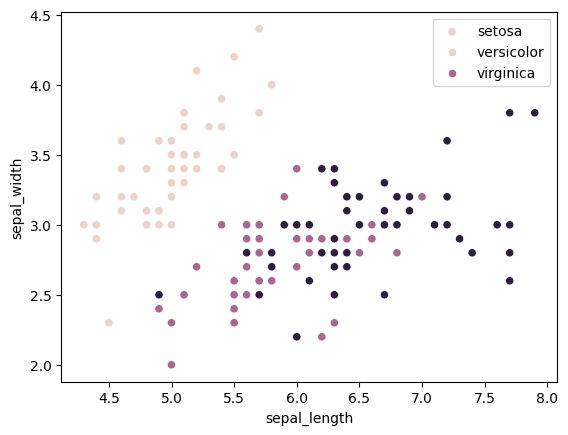

In [12]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='target')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

#### 4개 변수에 대한 산점도행렬

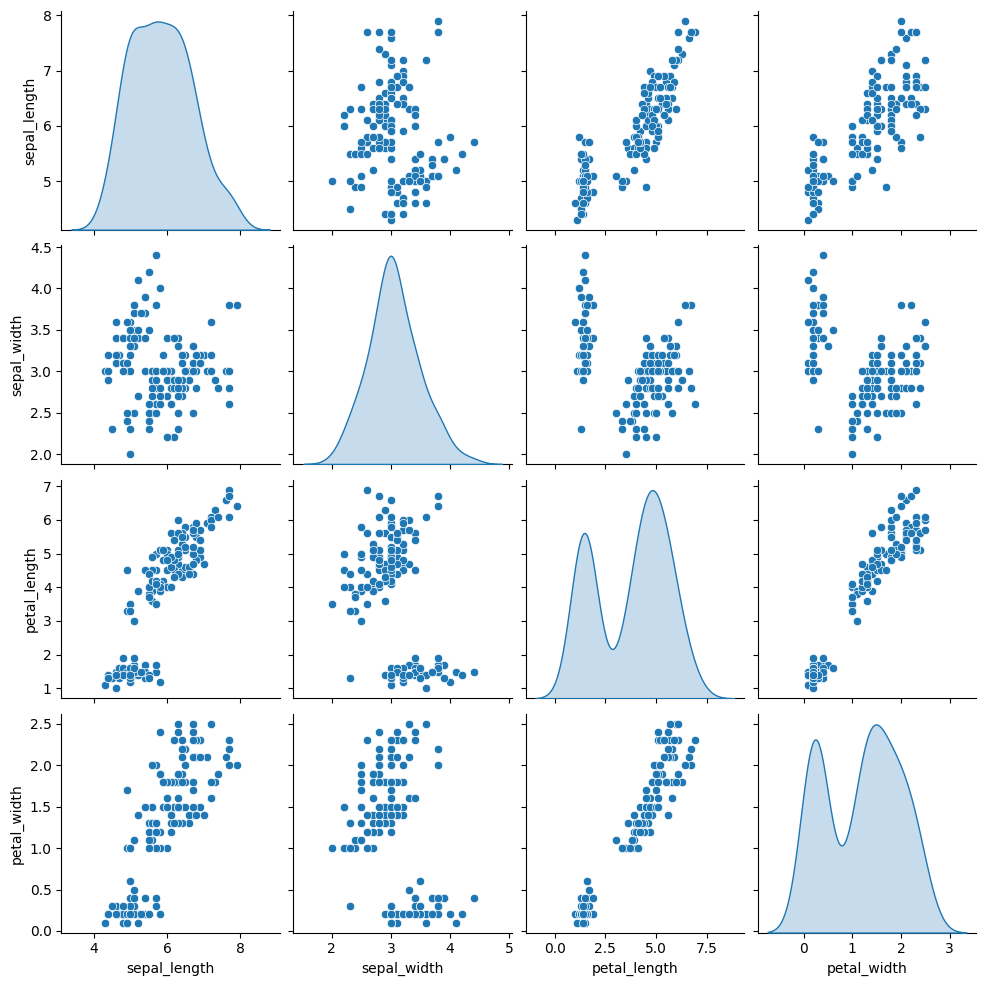

In [15]:
sns.pairplot(data=df.iloc[:,:-1], diag_kind='kde')
plt.show()

### PCA로 4개 속성을 2개로 압축하여 분포 시각화

- PCA 적용 전 StandardScaler 이용

**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

In [17]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(df.iloc[:,:-1])

In [18]:
scaled.shape

(150, 4)

In [19]:
scaled.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

#### PCA 변환

- PCA 클래스 임포트

In [20]:
from sklearn.decomposition import PCA

- PCA 객체 생성하여 차원축소

In [23]:
pca = PCA(n_components=2)
pca.fit(scaled)
iris_pca = pca.transform(scaled)
iris_pca.shape

(150, 2)

- pca 변환된 행렬을 데이터프레임으로 변환

In [24]:
pca_df = pd.DataFrame(iris_pca, columns=['pca_comp1','pca_comp2'])
pca_df['target'] = iris.target
pca_df.head(3)

,pca_comp1,pca_comp2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

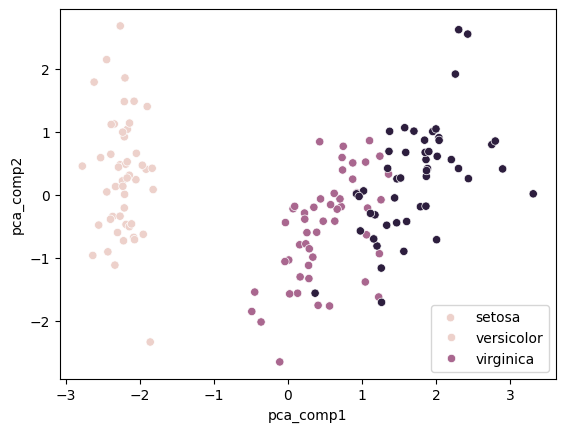

In [25]:
sns.scatterplot(data=pca_df, x='pca_comp1', y='pca_comp2', hue='target')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [27]:
pca.explained_variance_ratio_.sum()

np.float64(0.9581320720000166)

[결과]
- 첫번째 pca comp1 : 전체 변동성의 약 72.9% 차지
- 두번째 pca comp2 : 전체 변동성의 약 22.8% 차지
- 즉, 두 요소가 원본 데이터의 변동성을 약 95% 설명할 수 있음

**각 PCA Component별 변동성 비율**

PCA Component별로 원본 데이터의 변동성 반영 정도 확인  
PCA 객체의 explained_variance_ratio_ 속성  
- 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [29]:
rf = RandomForestClassifier(random_state=156)
X ,y = iris_pca, iris.target

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f'iris 원본데이터에 대한 교차검증(cv=5)')
print(f'- 개별정확도: {np.round(scores,3)}') 
print(f'- 평균정확도: {np.mean(scores):.3f}')

iris 원본데이터에 대한 교차검증(cv=5)
- 개별정확도: [0.833 0.933 0.833 0.833 0.967]
- 평균정확도: 0.880


In [31]:
rf = RandomForestClassifier(random_state=156)
X ,y = iris.data, iris.target

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f'iris 원본데이터에 대한 교차검증(cv=5)')
print(f'- 개별정확도: {np.round(scores,3)}') 
print(f'- 평균정확도: {np.mean(scores):.3f}')

iris 원본데이터에 대한 교차검증(cv=5)
- 개별정확도: [0.967 0.967 0.933 0.9   1.   ]
- 평균정확도: 0.953


[결과]
- 4개 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본데이터 대비 8 ~ 10% 하락
- 10% 정확도 하락은 비교적 큰 성능 수치의 감소이지만
    4개의 속성이 2개 속성으로 50% 감소한 것을 고려하면
    PCA 변환 후에도 원본데이터의 특성을 상당 부분 유지하고 있으므로 의미가 있음

### 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교

- Estimator :  RansdomForestClassifier  
- cross_val_score() 이용 3개의 교차 검증 세트로 정확도 결과 비교

#### 원본데이터 기반의 랜덤포레스트 분류 성능

#### PCA로 변환된 데이터 기반의 랜덤포레스트 분류 성능

---------------------------------